In [5]:
import numpy as np     #只需要下载numpy库即可
import GridWorld_v2

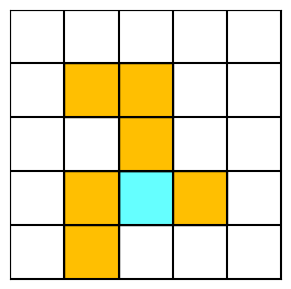

In [6]:
gamma = 0.9   #折扣因子，越接近0越近视

rows = 5      #记得行数和列数这里要同步改
columns = 5
# gridworld = GridWorld_v2.GridWorld_v2(rows=rows, columns=columns, forbiddenAreaNums=8, targetNums=2, seed = 52,forbiddenAreaScore=-10)
# gridworld = GridWorld_v2.GridWorld_v2(desc = [".#",".T"])             #赵老师4-1的例子
# gridworld = GridWorld_v2.GridWorld_v2(desc = ["##.T","...#","...."])  #随便弄的例子
desc = [".....",".##..","..#..",".#T#.",".#..."]
gridworld = GridWorld_v2.GridWorld_v2(forbidden_area_score=-10, score=1,desc=desc) 
#gridworld = GridWorld_v2.GridWorld_v2(forbiddenAreaScore=-10, score=1,desc = ["T."]) 
gridworld.show()

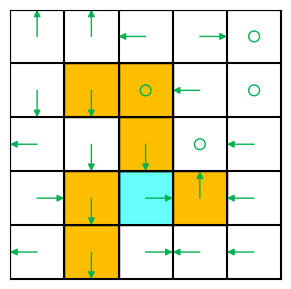

In [7]:
value = np.zeros(rows*columns).reshape(rows,columns)       #初始化可以任意，也可以全0
qtable = np.zeros((rows*columns,5)).reshape(rows,columns,5)  #初始化，这里主要是初始化维数，里面的内容会被覆盖所以无所谓
np.random.seed(50)
policy = np.eye(5)[np.random.randint(0,5,size=(rows*columns))].reshape(rows,columns,5) # TODO policy有一些不同,需要重新考虑绘图方法 
gridworld.show_policy(policy.argmax(axis=2))

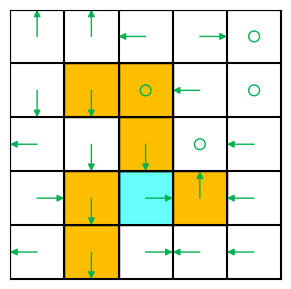

random policy
125.0


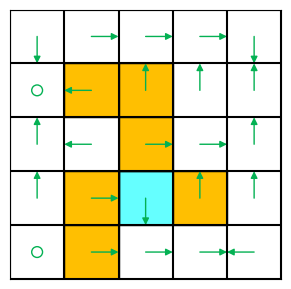

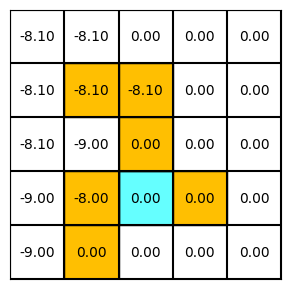

111970.613087837
111970.613087837


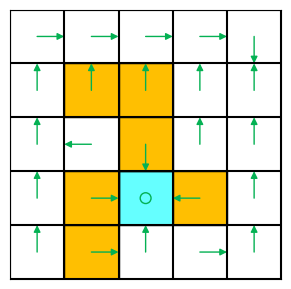

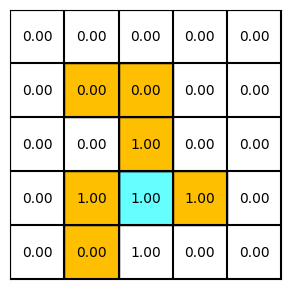

94723.5917047307
94723.5917047307


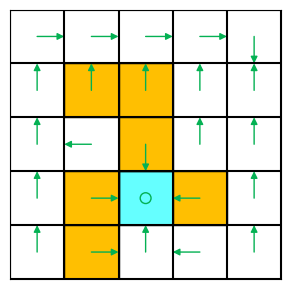

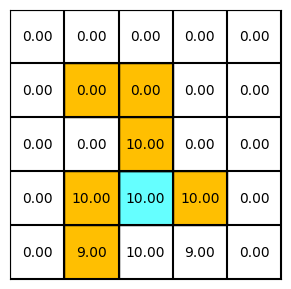

2275.9752162624122
2275.9752162624122


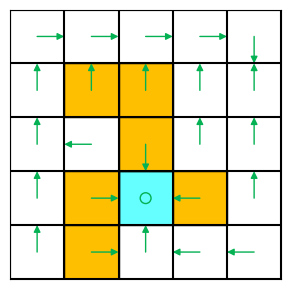

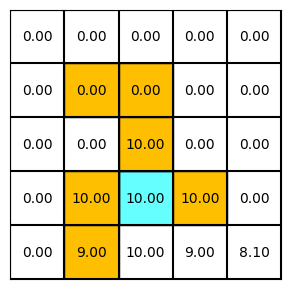

328.0306370259419
328.0306370259419


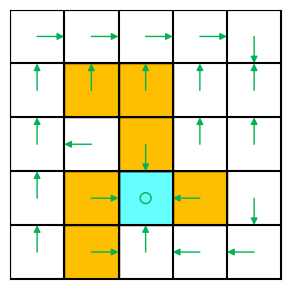

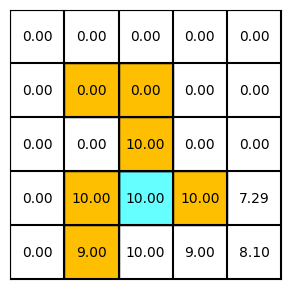

265.70307335192075
265.70307335192075


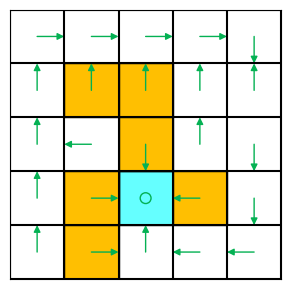

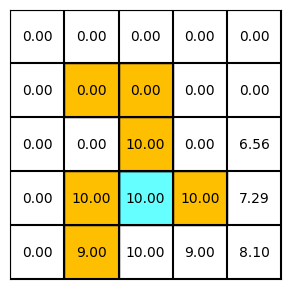

215.2179210453017
215.2179210453017


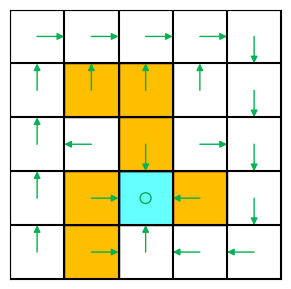

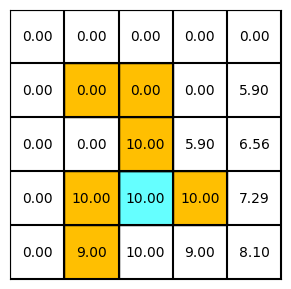

174.32510451934456
174.32510451934456


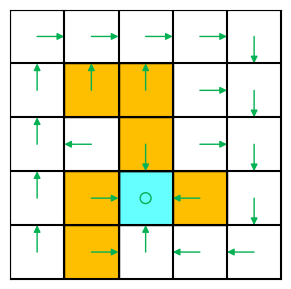

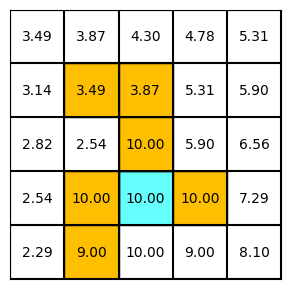

1005.2058492449106
1005.2058492449106


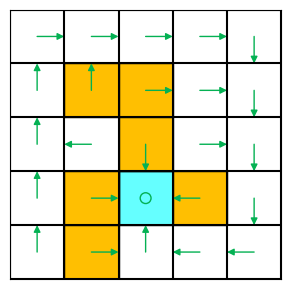

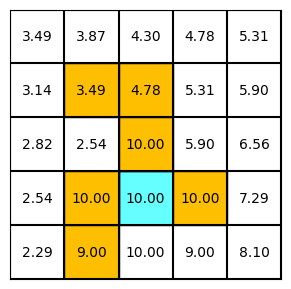

4.129261038120451
4.129261038120451


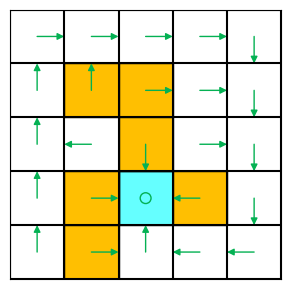

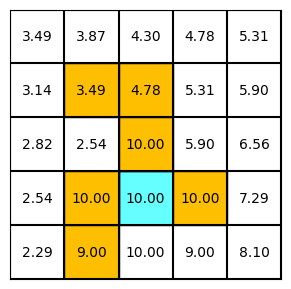

3.3447014408775724
3.3447014408775724


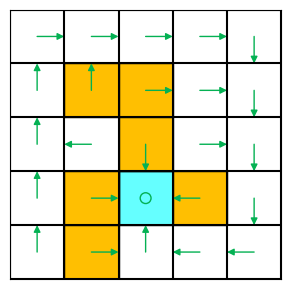

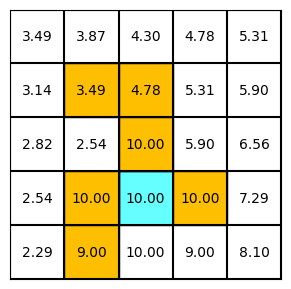

0.0


In [8]:
#通过采样的方法计算action value，model free的话意味着不知道整个gridworld的概率了，所以不能直接套贝尔曼方程迭代求解
trajectorySteps = 100
gridworld.show_policy(policy.argmax(axis=2))
print("random policy")
qtable_pre = qtable.copy()+1
while(np.sum((qtable_pre-qtable)**2)>0.001):
    print(np.sum((qtable_pre-qtable)**2))
    qtable_pre = qtable.copy()
    #通过采样获得action-value的值
    for now_x in range(rows):
        for now_y in range(columns):
            for j in range(5):
                Trajectory = gridworld.get_trajectory_score(now_state=(now_x,now_y), action=j, policy=policy, steps=trajectorySteps)
                
                # 注意这里的返回值是大小为(trajectorySteps+1)的元组列表，因为把第一个动作也加入进去了
                # 有一说一这个+1不+1到底有什么区别
                # a = r + gamma*r1 + gamma*gamma*r2 + gamma*gamma*gamma*r3 ……
                # 返回值是 S A R

                score = 0
                for k in reversed(Trajectory):
                    score = score*gamma + k[2]#细节从后往前优化算法
                qtable[now_x][now_y][j] = score #这里是通过采样，获得action value的值

    policy = np.eye(5)[np.argmax(qtable,axis=2).flatten()].reshape(rows,columns,5)  #qtable的最优值作为更新策略，并用独热码来表示
    gridworld.show_policy(policy.argmax(axis=2))
    gridworld.show_value(qtable.max(axis=2))
    print(np.sum((qtable_pre-qtable)**2))
